# MNIST 손글씨 - Neural Network

In [37]:
import numpy as np
import tensorflow as tf

In [38]:
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [39]:
from tensorflow.keras.datasets import mnist
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [40]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

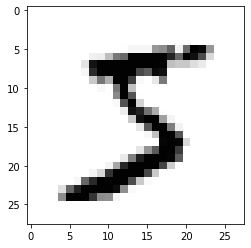

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [42]:
import sys
for x in X_train[0]:
  for i in x:
      sys.stdout.write('%d\t' % i)
  sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [43]:
# 0 ~ 1 사이의 값으로 정규화
X_train = X_train.reshape(-1, 784)
X_train = X_train / 255
X_train.shape

(60000, 784)

In [44]:
X_test = X_test.reshape(-1, 784)
X_test = X_test / 255
type(X_test[0,0])

numpy.float64

In [45]:
Y_class_train[0]

5

In [46]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 모델 정의, 설정, 학습

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [48]:
model = Sequential([
                    Dense(512, input_dim=784, activation='relu'),
                    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [49]:
# 모델 실행환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [51]:
# 모델 최적화 설정
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=1,save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [52]:
# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=30, batch_size=200, verbose=0,
                    callbacks=[checkpointer, early_stopping])


Epoch 00001: val_loss improved from inf to 0.17144, saving model to ./model/best001-0.1714.hdf5

Epoch 00002: val_loss improved from 0.17144 to 0.12332, saving model to ./model/best002-0.1233.hdf5

Epoch 00003: val_loss improved from 0.12332 to 0.10247, saving model to ./model/best003-0.1025.hdf5

Epoch 00004: val_loss improved from 0.10247 to 0.08734, saving model to ./model/best004-0.0873.hdf5

Epoch 00005: val_loss improved from 0.08734 to 0.08358, saving model to ./model/best005-0.0836.hdf5

Epoch 00006: val_loss did not improve from 0.08358

Epoch 00007: val_loss improved from 0.08358 to 0.07434, saving model to ./model/best007-0.0743.hdf5

Epoch 00008: val_loss did not improve from 0.07434

Epoch 00009: val_loss improved from 0.07434 to 0.07222, saving model to ./model/best009-0.0722.hdf5

Epoch 00010: val_loss did not improve from 0.07222

Epoch 00011: val_loss did not improve from 0.07222

Epoch 00012: val_loss did not improve from 0.07222

Epoch 00013: val_loss did not improv

In [53]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best009-0.0722.hdf5')

In [55]:
acc = best_model.evaluate(X_test, Y_test, verbose=2)[1]
print(f"\n Test Accuracy: {acc:.4f}")

313/313 - 0s - loss: 0.0650 - accuracy: 0.9789

 Test Accuracy: 0.9789


In [56]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

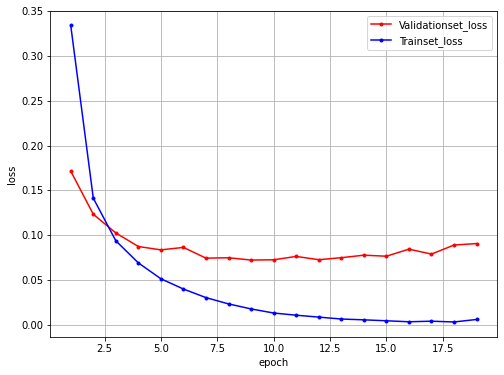

In [59]:
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()